In [1]:
import numpy as np
import cv2

def calcular_caracteristicas_hog(imagen, tamano_celda=16, num_bins=9):
    # nos aseguramos de que la imagen esté en escala de grises
    if len(imagen.shape) > 2:
        raise ValueError("La imagen de entrada debe estar en escala de grises")

    # Paso 1: Calculamos el gradiente usando filtros [-1, 0, 1]
    grad_x = cv2.filter2D(imagen, cv2.CV_32F, np.array([[-1, 0, 1]]))
    grad_y = cv2.filter2D(imagen, cv2.CV_32F, np.array([[-1], [0], [1]]))

    # Paso 2: Calculamos la magnitud y orientación del gradiente
    magnitud = np.sqrt(grad_x**2 + grad_y**2)
    orientacion = np.arctan2(grad_y, grad_x) * (180 / np.pi) % 180

    # Paso 3: Dividimos la imagen en celdas
    h, w = imagen.shape
    celdas_x = w // tamano_celda
    celdas_y = h // tamano_celda

    caracteristicas_hog = []

    # Paso 4: Calculamos histogramas para cada celda
    for i in range(celdas_y):
        for j in range(celdas_x):
            # Extraemos la región de la celda
            celda_mag = magnitud[i * tamano_celda:(i + 1) * tamano_celda, j * tamano_celda:(j + 1) * tamano_celda]
            celda_ori = orientacion[i * tamano_celda:(i + 1) * tamano_celda, j * tamano_celda:(j + 1) * tamano_celda]

            # Creamos el histograma para la celda
            histograma = np.zeros(num_bins, dtype=np.float32)
            ancho_bin = 180 / num_bins

            for m in range(celda_mag.shape[0]):
                for n in range(celda_mag.shape[1]):
                    # Determinar el bin para cada píxel
                    indice_bin = int(celda_ori[m, n] // ancho_bin) % num_bins
                    histograma[indice_bin] += celda_mag[m, n]

            # Normalizamos el histograma (norma L2)
            norma = np.linalg.norm(histograma)
            if norma != 0:
                histograma /= norma

            caracteristicas_hog.append(histograma)

    # Paso 5: Concatenamos todos los histogramas para formar el vector de características
    caracteristicas_hog = np.concatenate(caracteristicas_hog)

    return caracteristicas_hog

# Ejemplo de uso
if __name__ == "__main__":
    # Cargar una imagen de ejemplo en escala de grises de tamaño 128x128
    imagen = cv2.imread('cat.14.jpg', cv2.IMREAD_GRAYSCALE)
    if imagen is None:
        raise FileNotFoundError("Imagen no encontrada. Asegúrate de que 'sample_image.png' existe.")

    # Redimensionar la imagen a 128x128 para consistencia
    imagen = cv2.resize(imagen, (128, 128))

    # Calcular características HOG con tamaño de celda de 16
    caracteristicas_hog = calcular_caracteristicas_hog(imagen, tamano_celda=16, num_bins=9)
    cv2.imshow('Imagen media', ca)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    print(f"Longitud del vector de características HOG: {len(caracteristicas_hog)}")
    print(caracteristicas_hog)


Longitud del vector de características HOG: 576
[0.61299753 0.1755457  0.31291902 0.1347706  0.5808868  0.15069954
 0.2540121  0.22886607 0.01716753 0.4481957  0.15005474 0.28684843
 0.2920445  0.7465139  0.17714718 0.11225045 0.07698706 0.04290713
 0.55562145 0.20628308 0.18673211 0.35531235 0.5259881  0.3556919
 0.22624208 0.17902464 0.03465251 0.65456504 0.21452378 0.24398132
 0.24171117 0.47429386 0.24518164 0.18534258 0.23439372 0.18224168
 0.78017    0.05572856 0.03284159 0.00802451 0.01555091 0.02718076
 0.04319359 0.0753006  0.61528015 0.3135157  0.8793689  0.29358378
 0.02752798 0.02349341 0.02870013 0.03709973 0.04893379 0.1905847
 0.22260556 0.21868701 0.41480124 0.0433412  0.07263386 0.10416345
 0.4979566  0.2770564  0.6227661  0.344137   0.218666   0.15883575
 0.09936521 0.7696515  0.3329914  0.28166488 0.11815933 0.04592718
 0.24683535 0.16857953 0.31273183 0.19578691 0.8356502  0.22766867
 0.12297838 0.08495919 0.04509405 0.4266988  0.10163882 0.22279717
 0.4204967  0.70

[0.         0.         0.         0.         0.         0.
 0.46261415 0.         0.         0.10687674 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.08960358 0.
 0.         0.02096121 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.10285087 0.         0.         0.00892467
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.10568274 0.         0.         0.05171354 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.08428381 0.
 0.         0.01052347 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.08985581 0.         0.         0.05072021
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.    

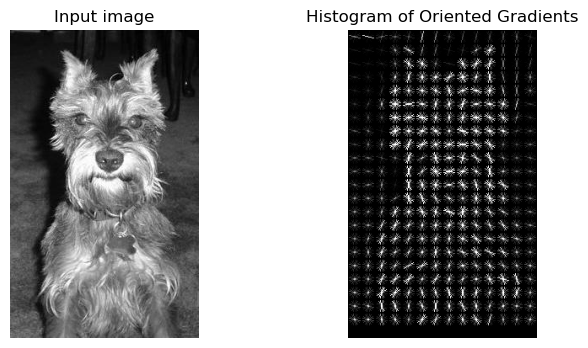

In [6]:
import matplotlib.pyplot as plt

from skimage.feature import hog
from skimage import data, exposure
import cv2

image =  cv2.imread('cat_dog_100/train/dog/dog.10005.jpg', 0)

fd, hog_image = hog(
    image,
    orientations=8,
    pixels_per_cell=(16, 16),
    cells_per_block=(1, 1),
    visualize=True,
    #channel_axis=-1, Esto por si lo queremos hacer a color
)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

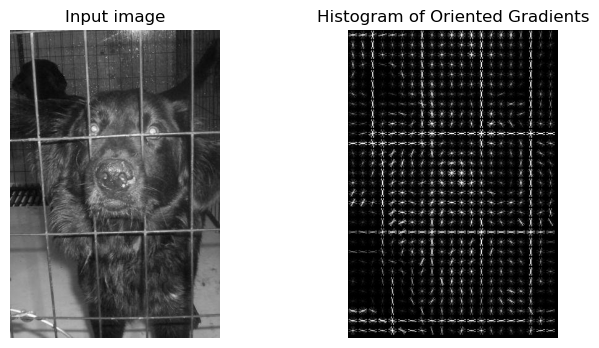

error: OpenCV(4.10.0) D:\bld\libopencv_1721302383308\work\modules\features2d\src\sift.dispatch.cpp:512: error: (-5:Bad argument) image is empty or has incorrect depth (!=CV_8U) in function 'cv::SIFT_Impl::detectAndCompute'


In [23]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.feature import hog
from skimage import data, exposure
import cv2

image =  cv2.imread('cat_dog_100/train/dog/dog.10059.jpg', 0)

fd, hog_image = hog(
    image,
    orientations=8,
    pixels_per_cell=(16, 16),
    cells_per_block=(1, 1),
    visualize=True,
    #channel_axis=-1, Esto por si lo queremos hacer a color
)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()
hog_image_uint8 = np.uint8(hog_image_rescaled * 255)
sift = cv2.SIFT_create()
kp = sift.detect(hog_image_rescaled,None)
img=cv2.drawKeypoints(hog_image_rescaled,kp,img)

cv2.imwrite('sift_keypoints.jpg',img)
          
cv2.imshow('dst',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

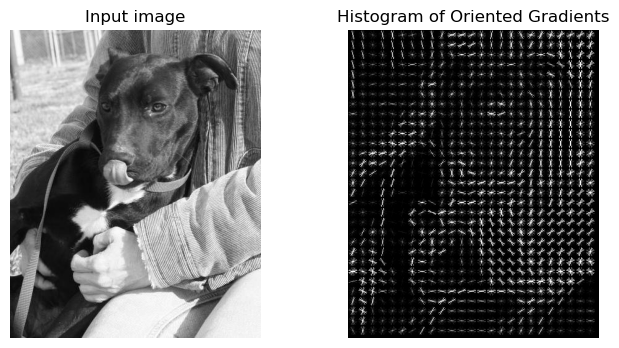

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.feature import hog
from skimage import exposure
import cv2

# Cargar la imagen en escala de grises
image = cv2.imread('cat_dog_100/train/dog/dog.10049.jpg', 0)

# Calcular el HOG y su visualización
fd, hog_image = hog(
    image,
    orientations=8,
    pixels_per_cell=(16, 16),
    cells_per_block=(1, 1),
    visualize=True,
)

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

# Visualizar la imagen original y la HOG
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)
ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

# Convertir a formato CV_8U (esperado por SIFT)
hog_image_uint8 = np.uint8(hog_image_rescaled * 255)

# Inicializar SIFT
sift = cv2.SIFT_create()

# Detectar keypoints
kp = sift.detect(hog_image_uint8, None)

# Dibujar keypoints en la imagen
img_with_keypoints = cv2.drawKeypoints(hog_image_uint8, kp, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Guardar y mostrar la imagen con keypoints
cv2.imwrite('sift_keypoints.jpg', img_with_keypoints)

cv2.imshow('SIFT Keypoints', img_with_keypoints)
cv2.waitKey(0)
cv2.destroyAllWindows()
